In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
data = pd.read_csv('ex2data1.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


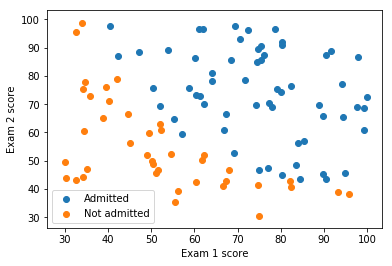

In [3]:
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [4]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1))

In [5]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [6]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [7]:
def gradientDescent(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [8]:
J = costFunction(theta, X, y)
J

0.6931471805599453

In [9]:
grad = gradientDescent(theta, X, y)
grad

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [10]:
test_theta = np.array([-24, 0.2, 0.2])[:, np.newaxis]
test_J = costFunction(test_theta, X, y)
test_grad = gradientDescent(test_theta, X, y)
print(test_J)
print(test_grad)

0.21833019382659796
[[0.04290299]
 [2.56623412]
 [2.64679737]]


In [11]:
theta_ans = opt.fmin_tnc(func = costFunction, x0 = theta.flatten(), fprime = gradientDescent, args = (X, y.flatten()))
theta_ans[0]

array([-25.16131862,   0.20623159,   0.20147149])

In [12]:
costFunction(theta_ans[0][:,np.newaxis], X, y)

0.20349770158947464

In [ ]:
t = [np.min(X[:,1]-2), np.max(X[:,2]+2)]


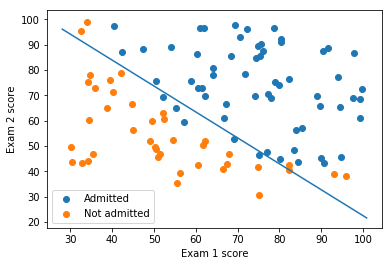

In [18]:
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(t, tt)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [14]:

t

[28.05882244669796, 100.86943574220612]

In [15]:

tt

array([96.16598095, 21.63509456])

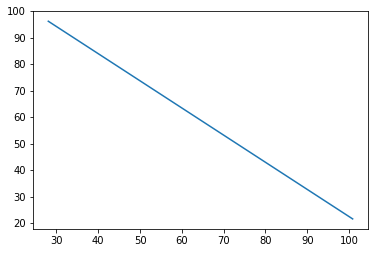

In [16]:
plt.plot(t, tt)

In [19]:
p = [sigmoid(np.dot(X, theta_ans[0])) >= 0.5]

In [20]:
np.mean(p == y.flatten())

0.89

# Regularized Logistic Regression

In [2]:
data = pd.read_csv('ex2data2.txt', header = None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


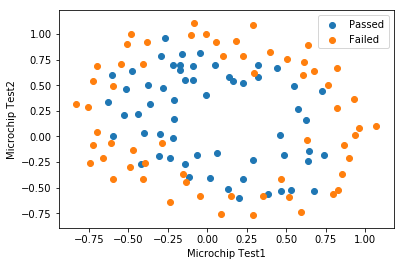

In [3]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [4]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
    return out

In [5]:
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

In [6]:
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))

In [7]:
lmbda = 1

In [11]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [8]:
def lrCostFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

In [9]:
def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [12]:
J = lrCostFunction(theta, X, y, lmbda)
J

array([[0.69314718]])

In [338]:
#theta_ans = lrGradientDescent(theta, X, y, lmbda)

In [13]:
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
theta

array([ 1.27271026,  0.62529965,  1.18111686, -2.01987398, -0.91743189,
       -1.43166928,  0.12393228, -0.36553118, -0.35725402, -0.1751629 ,
       -1.4581701 , -0.05098418, -0.61558548, -0.27469166, -1.19271297,
       -0.2421784 , -0.20603293, -0.04466179, -0.27778955, -0.29539513,
       -0.45645982, -1.04319156,  0.02779373, -0.29244876,  0.01555762,
       -0.32742407, -0.14389151, -0.92467487])

In [14]:
p = [sigmoid(np.dot(X, theta)) >= 0.5]

In [15]:
np.mean(p == y.flatten()) * 100

83.05084745762711

In [16]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

In [17]:
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

In [18]:
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)

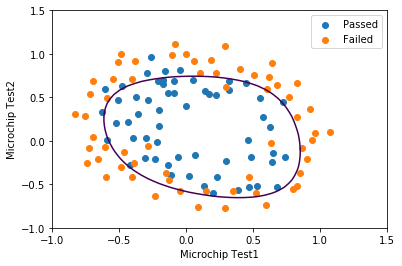

In [19]:
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [20]:
theta = np.zeros((n,1))
lmbda = 0
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
theta

ValueError: shapes (118,2) and (28,) not aligned: 2 (dim 1) != 28 (dim 0)